In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [90]:
df = pd.read_csv('data/Stroke_v1.csv')
df.head(2)

,ID,Weight,Smoking,Exercise,Cholesterol,Income,Exphappiness,Birthyear,Sex,Stroke
0,1,117,1,2,8.0,1080,27,1913,M,1
1,2,62,0,8,5.5,2120,55,1949,M,0


In [91]:
df.shape

(1000, 10)

In [92]:
df = df.dropna()
df.drop_duplicates()
df.shape

(1000, 10)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1000 non-null   int64  
 1   Weight        1000 non-null   int64  
 2   Smoking       1000 non-null   int64  
 3   Exercise      1000 non-null   int64  
 4   Cholesterol   1000 non-null   float64
 5   Income        1000 non-null   int64  
 6   Exphappiness  1000 non-null   int64  
 7   Birthyear     1000 non-null   int64  
 8   Sex           1000 non-null   object 
 9   Stroke        1000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 78.3+ KB


In [94]:
df = df.drop(columns=["ID"])

In [95]:
df["Sex"] = df["Sex"].map({"M": 1, "F": 2})

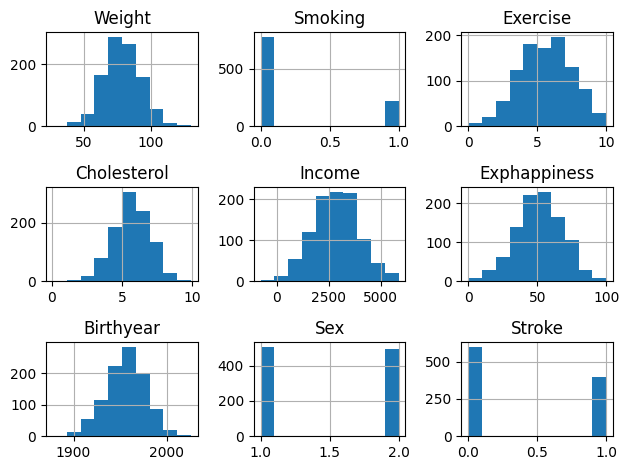

In [96]:
df.hist()
plt.tight_layout()
plt.show()

In [97]:
df.describe()

,Weight,Smoking,Exercise,Cholesterol,Income,Exphappiness,Birthyear,Sex,Stroke
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,78.752000,0.223000,5.119000,5.658400,2827.990000,51.024000,1955.716000,1.494000,0.400000
std,13.939038,0.416467,1.924199,1.312262,1105.714549,16.805888,21.149341,0.500214,0.490143
min,27.000000,0.000000,0.000000,0.100000,-790.000000,0.000000,1878.000000,1.000000,0.000000
25%,70.000000,0.000000,4.000000,4.800000,2087.500000,40.000000,1942.000000,1.000000,0.000000
50%,78.000000,0.000000,5.000000,5.600000,2830.000000,51.000000,1957.000000,1.000000,0.000000
75%,88.000000,0.000000,6.000000,6.500000,3562.500000,62.000000,1971.000000,2.000000,1.000000
max,130.000000,1.000000,10.000000,9.900000,5860.000000,100.000000,2026.000000,2.000000,1.000000


In [98]:
X = df.iloc[:, :8]
y = df.iloc[:, -1]

In [99]:
model = LogisticRegression(solver='liblinear')
model.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [100]:
model.intercept_, model.coef_

(array([-0.02305631]),
 array([[ 7.09563957e-02,  4.19534675e-01, -2.85656323e-01,
          1.49278726e-01,  9.40165007e-06, -3.66273726e-03,
         -2.70063527e-03, -1.14027602e-01]]))

In [101]:
probabilities = model.predict_proba(X)
probabilities

array([[0.01885003, 0.98114997],
       [0.93382969, 0.06617031],
       [0.80665824, 0.19334176],
       ...,
       [0.29202922, 0.70797078],
       [0.15559504, 0.84440496],
       [0.67110108, 0.32889892]], shape=(1000, 2))

In [102]:
regdata = pd.DataFrame(probabilities)
regdata

,0,1
0,0.018850,0.981150
1,0.933830,0.066170
2,0.806658,0.193342
3,0.749509,0.250491
4,0.915467,0.084533
...,...,...
995,0.785925,0.214075
996,0.281943,0.718057
997,0.292029,0.707971
998,0.155595,0.844405


In [103]:
from sklearn.metrics import log_loss 
logloss = log_loss(y, probabilities)
logloss

0.4819903905042405

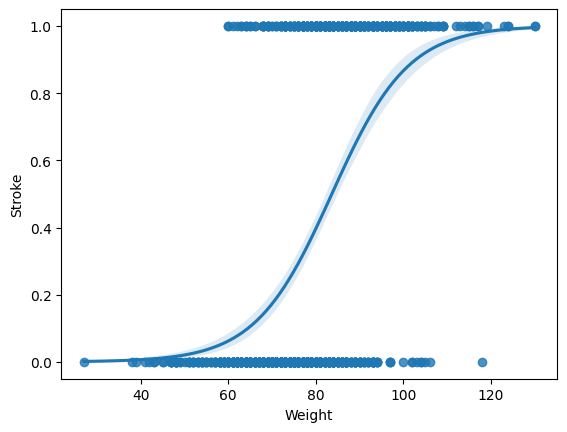

In [104]:
import seaborn as sns 

#sns.jointplot(x='Weight', y='Stroke', kind='reg', data=df, palette='rainbow')

sns.regplot(x='Weight', y='Stroke', data=df, logistic=True)
plt.show()



[Interpreting logistic regression summary from statsmodels](https://www.andrewvillazon.com/logistic-regression-python-statsmodels/)

In [105]:
import statsmodels.api as sm 

X2 = sm.add_constant(X)
logreg = sm.Logit(y,X2)
result = logreg.fit()

print(result.params) # coef result
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.478874
         Iterations 7
const          -20.678753
Weight           0.073317
Smoking          0.395117
Exercise        -0.254831
Cholesterol      0.235140
Income          -0.000038
Exphappiness    -0.000953
Birthyear        0.007409
Sex             -0.083286
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                 Stroke   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            8
Date:                Thu, 06 Nov 2025   Pseudo R-squ.:                  0.2885
Time:                        14:34:39   Log-Likelihood:                -478.87
converged:                       True   LL-Null:                       -673.01
Covariance Type:            nonrobust   LLR p-value:                 6.025e-79
                 

In [106]:
import statsmodels.api as sm 


X1 = X.drop(columns=['Exphappiness'])
X2 = sm.add_constant(X1)
logreg = sm.Logit(y,X2)
result = logreg.fit()

print(result.params) # coef result
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.478885
         Iterations 7
const         -20.883143
Weight          0.073552
Smoking         0.394749
Exercise       -0.257420
Cholesterol     0.235922
Income         -0.000043
Birthyear       0.007489
Sex            -0.080770
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                 Stroke   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      992
Method:                           MLE   Df Model:                            7
Date:                Thu, 06 Nov 2025   Pseudo R-squ.:                  0.2884
Time:                        14:34:39   Log-Likelihood:                -478.89
converged:                       True   LL-Null:                       -673.01
Covariance Type:            nonrobust   LLR p-value:                 7.873e-80
                  coef    std err          z      P

In [110]:
model1 = LogisticRegression(solver='liblinear')
model1.fit(X1,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [108]:
y_pred = model.predict(X)
y_pred1 = model1.predict(X1)


print(classification_report(y, y_pred))
print(classification_report(y, y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       600
           1       0.73      0.63      0.68       400

    accuracy                           0.76      1000
   macro avg       0.75      0.74      0.74      1000
weighted avg       0.76      0.76      0.76      1000

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       600
           1       0.74      0.64      0.68       400

    accuracy                           0.76      1000
   macro avg       0.76      0.74      0.75      1000
weighted avg       0.76      0.76      0.76      1000

